In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as stats
# Load the datasets
olist_order_items = pd.read_csv('dataset/olist_order_items_dataset.csv')
olist_products = pd.read_csv('dataset/olist_products_dataset.csv')

In [2]:
# Perform the LEFT JOINS step by step

merged_df = pd.merge(
    olist_order_items, olist_products,
    on='product_id',
    how='left'
)

In [3]:
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [4]:
product_translation = pd.read_csv('dataset/product_category_name_translation.csv')
product_translation.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
merged_df = pd.merge(
    merged_df, product_translation,
    left_on='product_category_name', right_on='product_category_name',
    how='left'
)

In [6]:
olist_orders = pd.read_csv('dataset/olist_orders_dataset.csv')
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
merged_df = pd.merge(
    merged_df, olist_orders,
    on='order_id',
    how='left'
)



In [8]:
olist_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
olist_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18-01-18 0:00,18-01-18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10-03-18 0:00,11-03-18 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17-02-18 0:00,18-02-18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21-04-17 0:00,21-04-17 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01-03-18 0:00,02-03-18 10:26


In [9]:
merged_df = pd.merge(
    merged_df, olist_reviews,
    on='order_id',
    how='left'
)



In [10]:
olist_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv')
olist_payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
merged_df = pd.merge(
    merged_df, olist_payments,
    on='order_id',
    how='left'
)
merged_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",21-09-17 0:00,22-09-17 10:57,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,13-05-17 0:00,15-05-17 11:34,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,23-01-18 0:00,23-01-18 16:06,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,15-08-18 0:00,15-08-18 16:39,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,02-03-17 0:00,03-03-17 10:54,1.0,credit_card,3.0,218.04


In [12]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [13]:
# Select specific columns
final_df = merged_df[[
    'order_id',
    'product_id',
    'order_item_id',
    'product_category_name_english',  # Renamed as product_name in the query
    'price',
    'payment_installments',
    'payment_type',
    'order_status',
    'review_score'
]]




In [14]:
final_df.head()

,order_id,product_id,order_item_id,product_category_name_english,price,payment_installments,payment_type,order_status,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2.0,credit_card,delivered,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3.0,credit_card,delivered,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5.0,credit_card,delivered,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,12.99,2.0,credit_card,delivered,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3.0,credit_card,delivered,5.0


In [15]:
# Rename column to match SQL alias
final_df = final_df.rename(columns={
    'product_category_name_english': 'product_name',
    'payment_installments_x': 'payment_installments',
    'payment_type_x': 'payment_type'
})
final_df.head()

,order_id,product_id,order_item_id,product_name,price,payment_installments,payment_type,order_status,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2.0,credit_card,delivered,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3.0,credit_card,delivered,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5.0,credit_card,delivered,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,12.99,2.0,credit_card,delivered,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3.0,credit_card,delivered,5.0


In [16]:
final_df.columns.value_counts()

order_id                1
product_id              1
order_item_id           1
product_name            1
price                   1
payment_installments    1
payment_type            1
order_status            1
review_score            1
Name: count, dtype: int64

In [17]:
# Display the resulting DataFrame
final_df.head()

,order_id,product_id,order_item_id,product_name,price,payment_installments,payment_type,order_status,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2.0,credit_card,delivered,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3.0,credit_card,delivered,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5.0,credit_card,delivered,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,12.99,2.0,credit_card,delivered,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3.0,credit_card,delivered,5.0


In [18]:
# final_df.to_csv('order_dataset.csv', index= False)

In [19]:
final_df.duplicated().value_counts()

False    115586
True       2724
Name: count, dtype: int64

In [20]:
final_df.drop_duplicates(inplace=True)

In [21]:
final_df.shape

(115586, 9)

In [22]:
final_df.head()

,order_id,product_id,order_item_id,product_name,price,payment_installments,payment_type,order_status,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2.0,credit_card,delivered,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3.0,credit_card,delivered,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5.0,credit_card,delivered,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,12.99,2.0,credit_card,delivered,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3.0,credit_card,delivered,5.0


In [23]:
# final_df.to_csv('order_dataset_cleaned.csv', index= False)

In [24]:
final_df.isnull().sum()

order_id                   0
product_id                 0
order_item_id              0
product_name            1677
price                      0
payment_installments       3
payment_type               3
order_status               0
review_score             967
dtype: int64

In [25]:
final_df.isnull().sum()/len(final_df) * 100

order_id                0.000000
product_id              0.000000
order_item_id           0.000000
product_name            1.450868
price                   0.000000
payment_installments    0.002595
payment_type            0.002595
order_status            0.000000
review_score            0.836607
dtype: float64

In [26]:
final_df.dropna(inplace=True)

In [27]:
final_df.isna().sum()

order_id                0
product_id              0
order_item_id           0
product_name            0
price                   0
payment_installments    0
payment_type            0
order_status            0
review_score            0
dtype: int64

In [28]:
final_df['review_score'] = final_df['review_score'].astype(int)
final_df['payment_installments'] = final_df['payment_installments'].astype(int)


In [29]:
final_df.shape

(112953, 9)

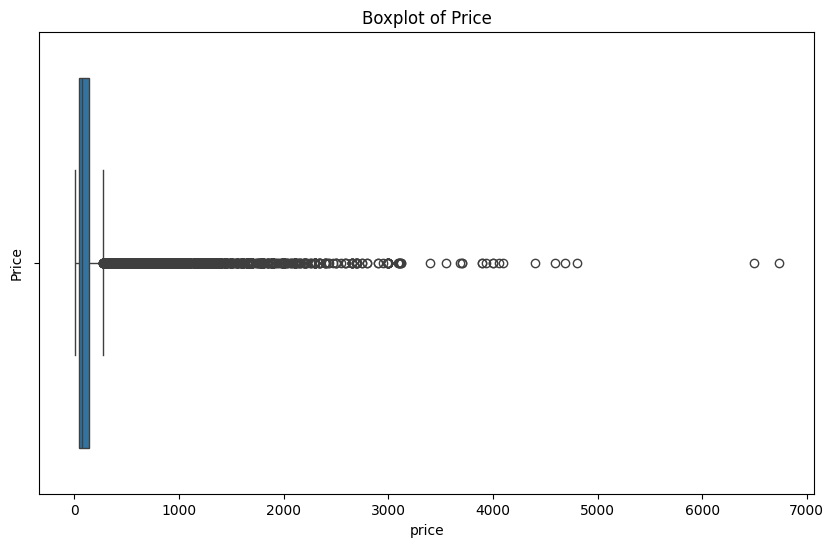

In [30]:
plt.figure(figsize=(10, 6))
# plt.boxplot(final_df['price'], vert=True, patch_artist=True)
sns.boxplot(x =final_df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

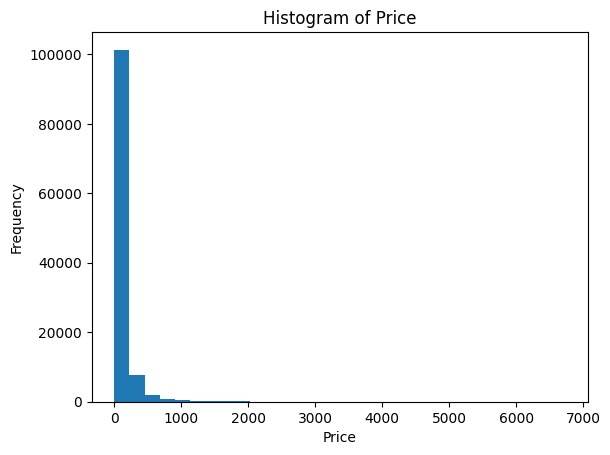

In [31]:
plt.hist(final_df['price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

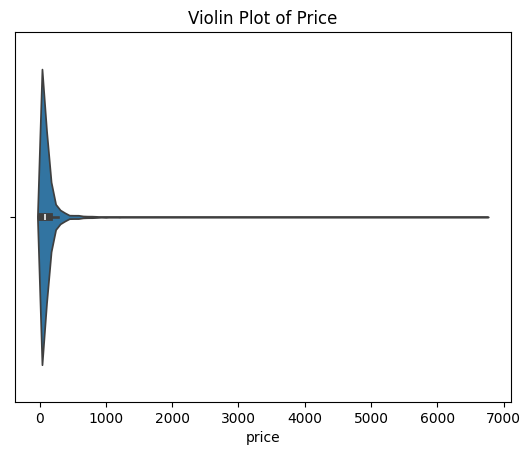

In [32]:
import seaborn as sns
sns.violinplot(x=final_df['price'])
plt.title('Violin Plot of Price')
plt.show()


In [33]:
# from scipy.stats import zscore
# final_df['price_zscore'] = zscore(final_df['price'])
# outliers = final_df[final_df['price_zscore'].abs() > 3]
# print(outliers)
# final_df.drop('price_zscore', axis=1, inplace=True)

In [34]:
def remove_outliers_capping(final_df, outlier_columns, lower_quantile=0.03, upper_quantile=0.97):
    # Create a deep copy of the original dataframe
    df_capped = final_df.copy()

    # Define lower and upper limits for capping
    lwr_limit = df_capped['price'].quantile(lower_quantile)
    upr_limit = df_capped['price'].quantile(upper_quantile)

    print(str('price').upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()

    # Apply capping to the outliers
    df_capped['price'] = np.where(df_capped['price'] > upr_limit, upr_limit,
                            np.where(df_capped['price'] < lwr_limit, lwr_limit, df_capped['price']))

    return df_capped

df = remove_outliers_capping(final_df, 'price')

PRICE
lwr: 13.99 upr: 498.9



In [35]:
df.columns

Index(['order_id', 'product_id', 'order_item_id', 'product_name', 'price',
       'payment_installments', 'payment_type', 'order_status', 'review_score'],
      dtype='object')

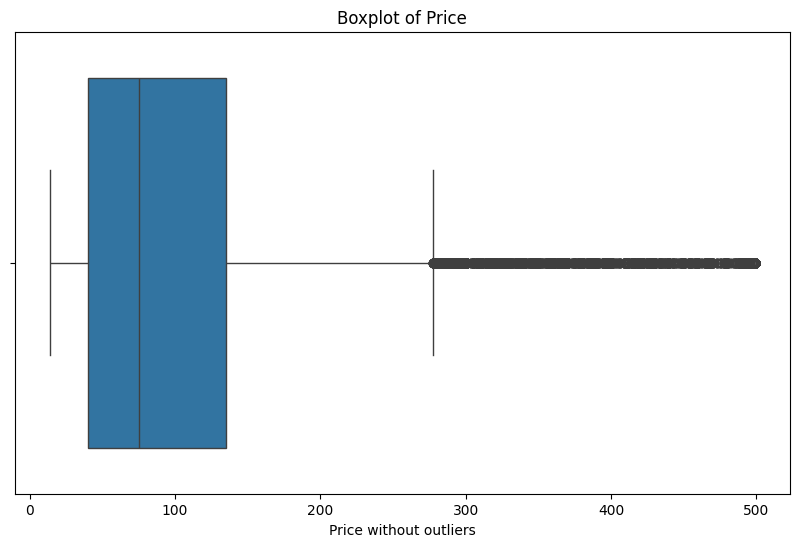

In [36]:
plt.figure(figsize=(10, 6))
# plt.boxplot(final_df['price'], vert=True, patch_artist=True)
sns.boxplot(x =df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price without outliers')
plt.show()

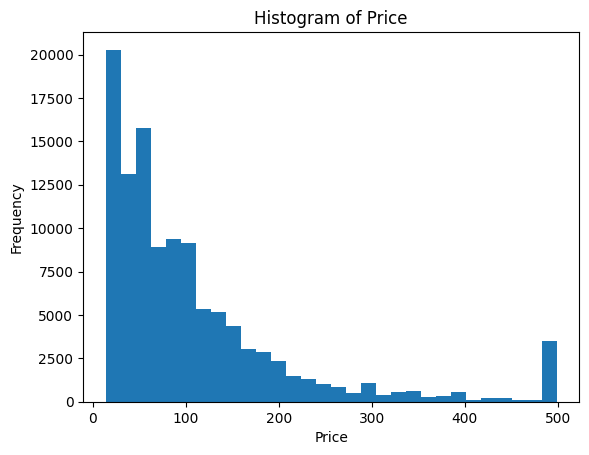

In [37]:
plt.hist(df['price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

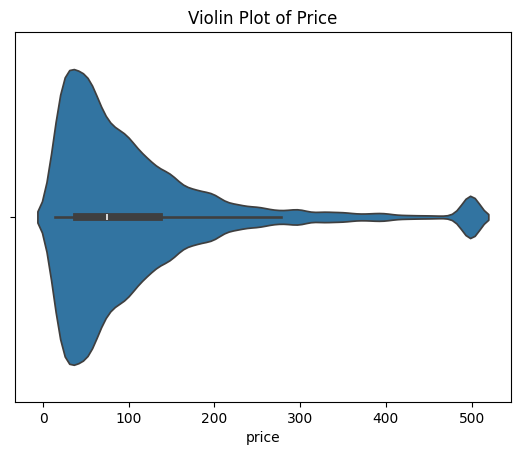

In [38]:
sns.violinplot(x=df['price'])
plt.title('Violin Plot of Price')
plt.show()

# Data Analysis #

In [39]:
df.columns

Index(['order_id', 'product_id', 'order_item_id', 'product_name', 'price',
       'payment_installments', 'payment_type', 'order_status', 'review_score'],
      dtype='object')

### Case 1 — Analyzing the Product Categories That are Ordered the Most and generate the highest revenue

In [40]:
products = df.groupby('product_name')['order_id'].count().sort_values(ascending=False)
pd.DataFrame(products).head(10)

,order_id
product_name,
bed_bath_table,11355
health_beauty,9767
sports_leisure,8778
furniture_decor,8511
computers_accessories,7970
housewares,7111
watches_gifts,6072
telephony,4617
garden_tools,4433


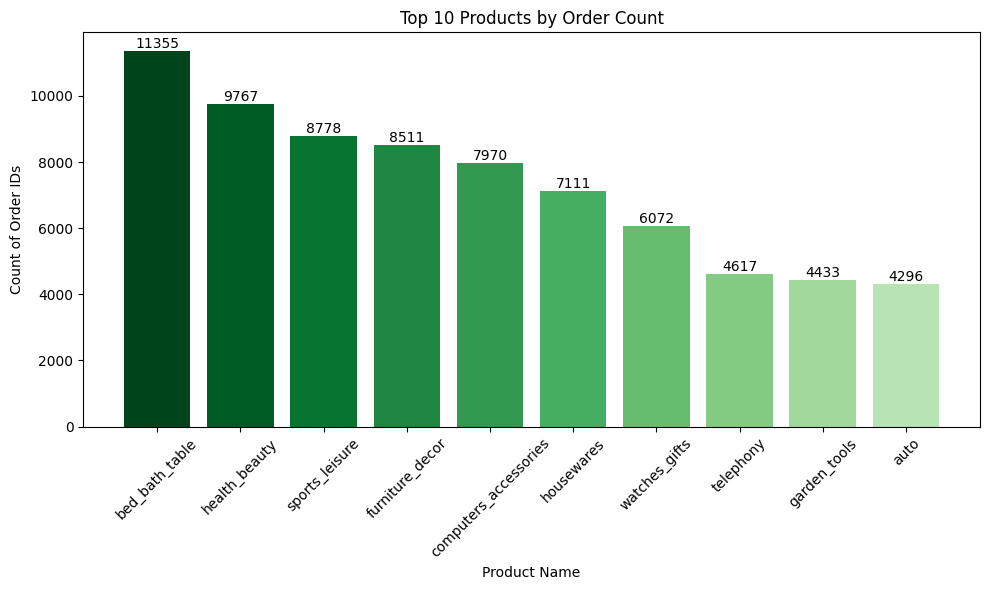

In [41]:
# Set the number of top products to display
top_n = 10

# Get the top N products with the highest count of order IDs
top_products = products.head(top_n)
# print(top_products.values)
# Create a sequential color map for the bars
cmap = plt.cm.Greens
# # # Generate a gradient of colors for the bars
colors = np.linspace(1, 0.3, top_n)

# Create a bar plot with gradient colors
plt.figure(figsize=(10, 6))
bars = plt.bar(top_products.index, top_products.values, color= cmap(colors))

# Add text labels on top of each bar showing the count for each product
for bar, count in zip(bars, top_products.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f"{count}", 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Set the labels and title
plt.xlabel('Product Name')
plt.ylabel('Count of Order IDs')
plt.title(f'Top {top_n} Products by Order Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure everything fits within the plot area
plt.tight_layout()

# Display the plot
plt.show()


### Top 10 Product by revenue

In [42]:
df['revenue'] = df['price'] * df['order_item_id']
df.head()

,order_id,product_id,order_item_id,product_name,price,payment_installments,payment_type,order_status,review_score,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2,credit_card,delivered,5,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3,credit_card,delivered,4,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5,credit_card,delivered,5,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,13.99,2,credit_card,delivered,4,13.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3,credit_card,delivered,5,199.90


In [43]:
print(df['order_item_id'].value_counts())

order_item_id
1     99007
2      9811
3      2271
4       959
5       454
6       252
7        58
8        34
9        27
10       24
11       16
12       12
13        7
14        6
15        4
16        2
17        2
18        2
19        2
20        2
21        1
Name: count, dtype: int64


In [44]:
df_revenue = df.groupby('product_name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
df_revenue.head(10)

,product_name,revenue
43,health_beauty,1248484.49
7,bed_bath_table,1235287.41
70,watches_gifts,1081210.96
15,computers_accessories,1065919.19
65,sports_leisure,1016906.78
39,furniture_decor,935717.10
49,housewares,735160.71
20,cool_stuff,608190.88
5,auto,581580.33
42,garden_tools,528125.05


C:\Users\jiten\AppData\Local\Temp\ipykernel_13800\1142191233.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


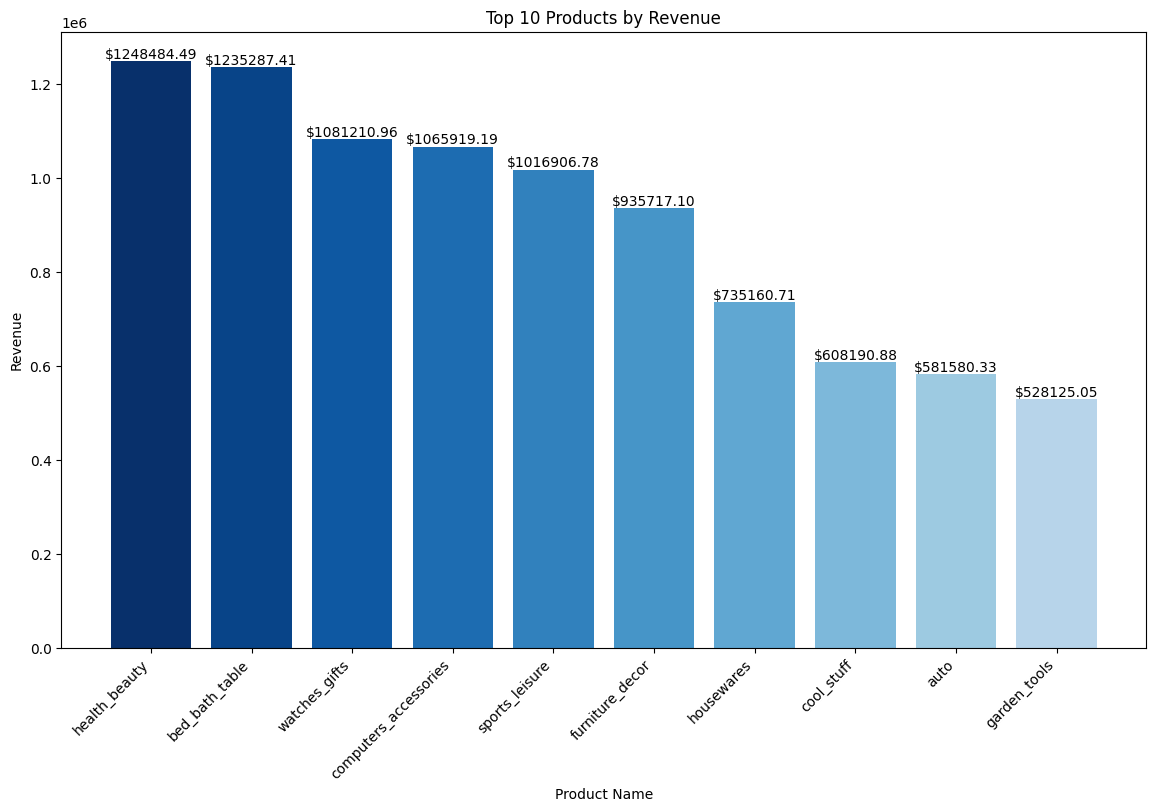

In [45]:
top_n = 10
top_products = df_revenue.head(top_n)
cmap = plt.cm.get_cmap('Blues')
colors = np.linspace(1, 0.3, top_n)
plt.figure(figsize=(14, 8))
bars = plt.bar(top_products['product_name'], top_products['revenue'], color=cmap(colors))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'${bar.get_height():.2f}', ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.xlabel('Product Name')
plt.title(f'Top {top_n} Products by Revenue')
plt
plt.show()


### Case 2— Analyzing the Product Categories Most Frequently Abandoned by Customers.

In [46]:
canceled = df[df['order_status'] == 'canceled'].groupby('product_name')['order_id'].count().reset_index().sort_values('order_id', ascending=False)
canceled.head(10)

,product_name,order_id
40,sports_leisure,51
31,housewares,50
8,computers_accessories,44
28,health_beauty,40
25,furniture_decor,36
43,toys,34
3,auto,30
44,watches_gifts,20
27,garden_tools,20
4,baby,20


C:\Users\jiten\AppData\Local\Temp\ipykernel_13800\3567384584.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Greens')


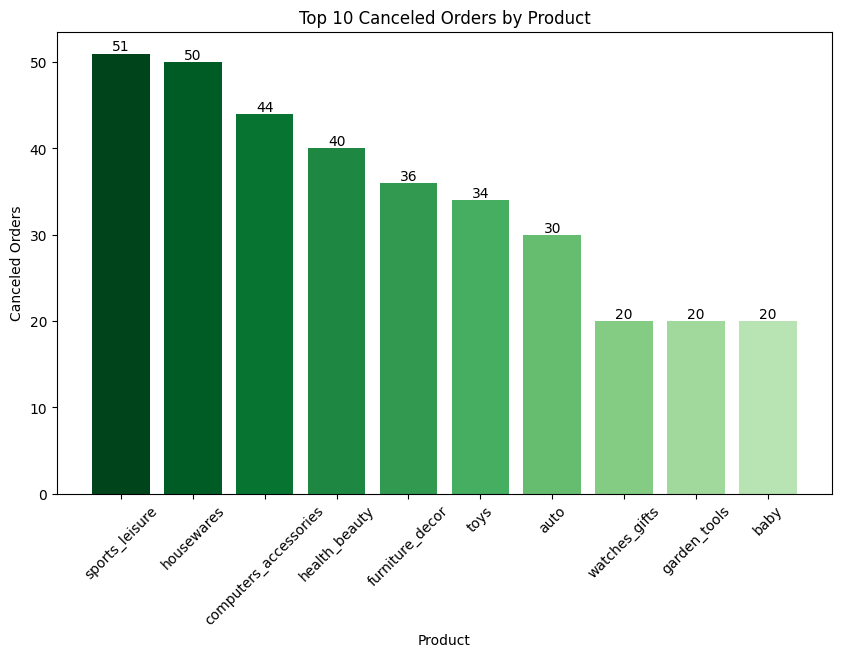

In [47]:
top_n = 10
product_canceled = canceled.head(top_n)
product_canceled.head()
cmap = plt.cm.get_cmap('Greens')
colors = np.linspace(1, 0.3, top_n)
plt.figure(figsize=(10, 6))
bars = plt.bar(product_canceled['product_name'], product_canceled['order_id'], color= cmap(colors))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Canceled Orders')
plt.title(f'Top {top_n} Canceled Orders by Product')
plt.show()

In [48]:
df

,order_id,product_id,order_item_id,product_name,price,payment_installments,payment_type,order_status,review_score,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,58.90,2,credit_card,delivered,5,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,239.90,3,credit_card,delivered,4,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,199.00,5,credit_card,delivered,5,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,13.99,2,credit_card,delivered,4,13.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,199.90,3,credit_card,delivered,5,199.90
...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1,housewares,299.99,1,boleto,delivered,5,299.99
118306,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1,computers_accessories,350.00,1,boleto,delivered,5,350.00
118307,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1,sports_leisure,99.90,3,credit_card,delivered,5,99.90
118308,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1,computers_accessories,55.99,3,credit_card,delivered,5,55.99


### Case 3— Analyzing the Product Categories Most Positive Reviews by Customers as well as its Reviews Proportions.

In [49]:
reviews = df[df['review_score'] == 5].groupby('product_name')['review_score'].count().sort_values(ascending=False)
#pd.DataFrame(reviews)
reviews

product_name
health_beauty                5920
bed_bath_table               5876
sports_leisure               5195
furniture_decor              4542
computers_accessories        4264
                             ... 
home_comfort_2                 13
diapers_and_hygiene            12
la_cuisine                     11
cds_dvds_musicals              10
fashion_childrens_clothes       7
Name: review_score, Length: 70, dtype: int64

In [50]:
top_n = 10
reviews_product = reviews.head(top_n)
reviews_product

product_name
health_beauty            5920
bed_bath_table           5876
sports_leisure           5195
furniture_decor          4542
computers_accessories    4264
housewares               4084
watches_gifts            3409
toys                     2572
garden_tools             2526
auto                     2416
Name: review_score, dtype: int64

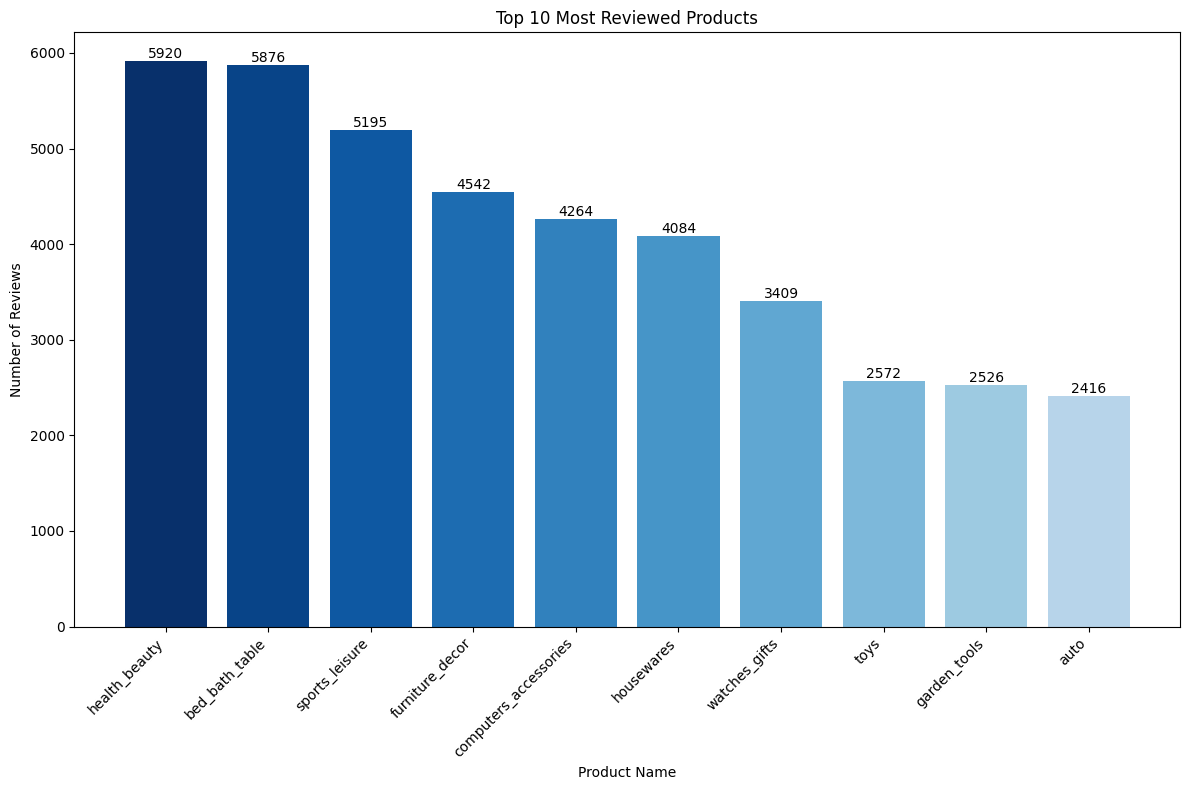

In [51]:
cmap = plt.cm.Blues
colors = np.linspace(1, 0.3, top_n)
plt.figure(figsize=(12, 8))
bars = plt.bar(reviews_product.index, reviews_product.values, color=cmap(colors))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center',va ='bottom')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

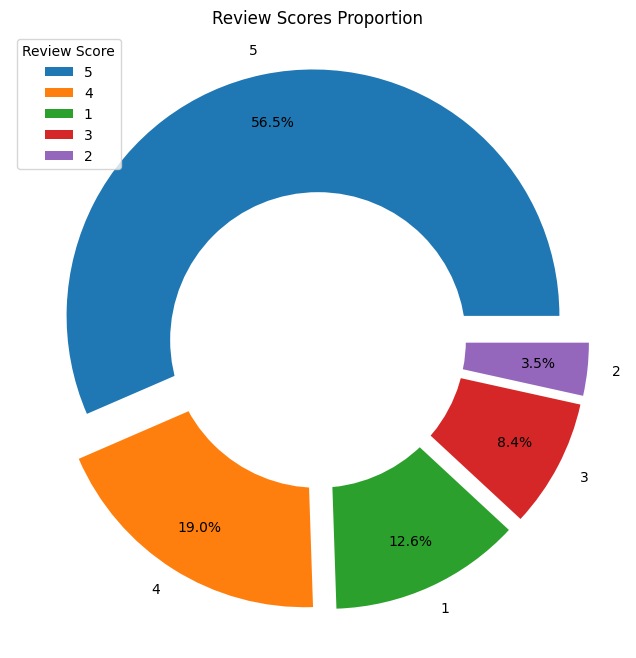

In [52]:
import pandas as pd
unique_score = df['review_score'].unique()
proportion = round(df['review_score'].value_counts()/len(df) * 100, 2)
unique_scores = pd.DataFrame({'review_score': unique_score, 'review_proportion': proportion}) 

explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(8, 8))
plt.pie(unique_scores['review_proportion'], labels = unique_scores['review_score'], autopct='%1.1f%%', pctdistance=0.8, explode=explode)
center_circle = plt.Circle((0, 0), 0.6, fc = 'white' )
plt.gca().add_artist(center_circle)
plt.legend(unique_scores['review_score'], loc='upper left', title='Review Score')
plt.title('Review Scores Proportion')
plt.show()

In [53]:
unique_scores

,review_score,review_proportion
review_score,,
5,5,56.51
4,4,19.02
1,1,12.57
3,3,8.44
2,2,3.46


### Case 4— Analyzing the Payments type Installment Proportion that are used by Customers.

In [54]:
df['payment_type'].value_counts()

payment_type
credit_card    84828
boleto         22424
voucher         4050
debit_card      1651
Name: count, dtype: int64

In [55]:
import pandas as pd
unique_payment = df['payment_type'].unique()
proportion = round(df['payment_type'].value_counts()/ len(df) * 100, 2)
proportions = pd.DataFrame({'pay_unique_payment' : unique_payment, 'pay_proportion': proportion })
print(proportions)


             pay_unique_payment  pay_proportion
payment_type                                   
credit_card         credit_card           75.10
boleto                   boleto           19.85
voucher                 voucher            3.59
debit_card           debit_card            1.46


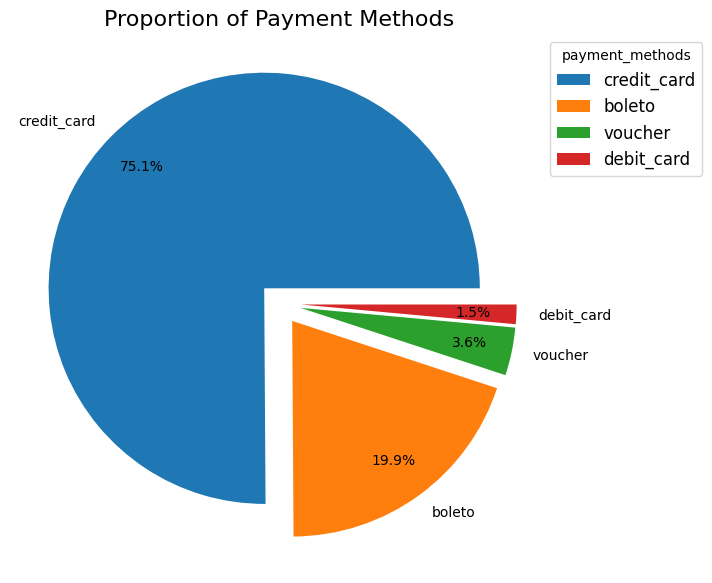

In [56]:
explode = (0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(7,7))
plt.pie(proportions['pay_proportion'], labels=proportions['pay_unique_payment'], autopct='%1.1f%%', pctdistance=0.8,
         explode = explode)
# center_circle = plt.Circle((0, 0), 0.6, fc = 'white' )
# plt.gca().add_artist(center_circle)

plt.title('Proportion of Payment Methods', fontsize=16)
plt.legend(proportions['pay_unique_payment'], loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12, title = 'payment_methods')
plt.show()

###  Payment installment most frequently chosed by coustomers for their transaction using credit card

In [57]:
credit = df[df['payment_type'] == 'credit_card'].groupby('payment_installments')['payment_installments'].count().sort_values(ascending=False)
credit = pd.DataFrame(credit)
credit_top5 =credit.head(5)
credit_top5

,payment_installments
payment_installments,
1,27164
2,13351
3,11473
4,7812
10,6739


C:\Users\jiten\AppData\Local\Temp\ipykernel_13800\3305780524.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Greens')


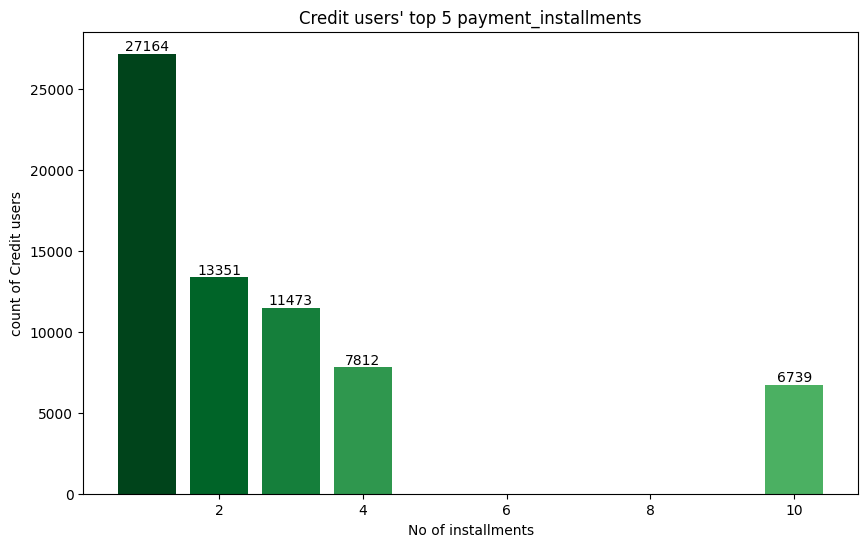

In [58]:
plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap('Greens')
colors = np.linspace(1, 0.6, 5)
bars = plt.bar(credit_top5.index, credit_top5['payment_installments'], color = cmap(colors))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
plt.ylabel('count of Credit users')
plt.xlabel('No of installments')
plt.title('Credit users\' top 5 payment_installments')
plt.show()